In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as SC

In [28]:
uploaded = files.upload()

In [57]:
DS = pd.read_csv("student-mat.csv")

In [58]:
DS.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [59]:
newDS= DS.iloc[0: , 30:]
newDS.head()

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


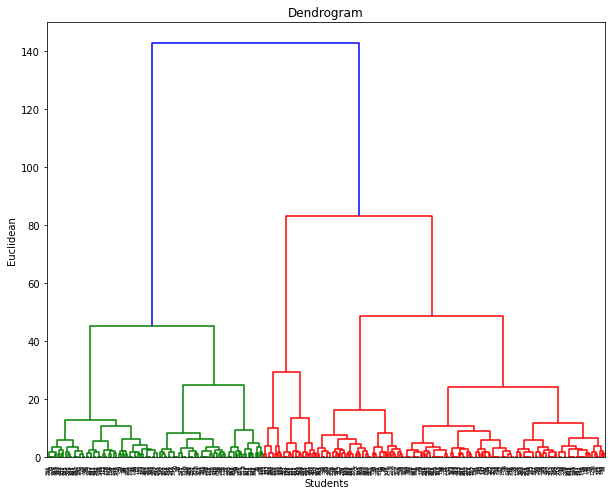

In [60]:
plt.figure(figsize=(10,8))
dendrogram = SC.dendrogram(SC.linkage(newDS, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean')
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering 
cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean',linkage ='complete')

In [47]:
cluster.fit(newDS)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [37]:
NCluster=cluster.fit_predict(newDS)

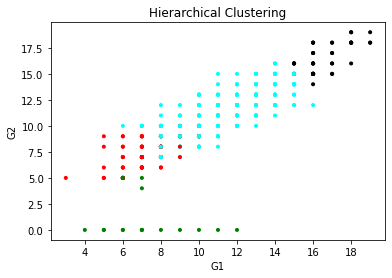

In [40]:
colors= ['cyan', 'red', 'black', 'green']
labels= ['Cluster1' ,'Cluster2', 'Cluster3', 'Cluster4']

colorLabel= [colors[cluster.labels_[i]] for i in range(len(cluster.labels_)) ]

plt.scatter(newDS['G1'], newDS['G2'], color= colorLabel, marker='.')
plt.title("Hierarchical Clustering")
plt.xlabel("G1")
plt.ylabel('G2')
plt.show()

In [55]:
features = ['average']
for feature in features:
  X = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = feature)
  X.fit(newDS)
  print(f'Linkage {feature}score{silhouette_score(newDS,X.labels_)}')

Linkage averagescore0.3786374131372898
